In [1]:
from datetime import date, datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/US_Superstore_data.csv', parse_dates=['Ship Date', 'Order Date'])

new_cols_name = ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit']
df.columns = new_cols_name
df.head(3)

row_id        order_id order_date  ship_date     ship_mode customer_id  \
0       1  CA-2016-152156 2016-08-11 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11  Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-06-16  Second Class    DV-13045   

     customer_name    segment        country         city  ... postal_code  \
0      Claire Gute   Consumer  United States    Henderson  ...       42420   
1      Claire Gute   Consumer  United States    Henderson  ...       42420   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   

   region       product_id         category sub_category  \
0   South  FUR-BO-10001798        Furniture    Bookcases   
1   South  FUR-CH-10000454        Furniture       Chairs   
2    West  OFF-LA-10000240  Office Supplies       Labels   

                                        product_name   sales  quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   discount    profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714  

[3 rows x 21 columns]

In [3]:
df.describe()

row_id   postal_code         sales     quantity     discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [4]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## Q.1 สินค้าประเภทไหนทำยอดขายมากที่ดสุด

In [92]:
q1_df = df[['category', 'sub_category', 'quantity']]\
            .groupby(['category', 'sub_category'])\
            .sum()\
            .reset_index()

# คำนวน Ratio ของการขาย
sum_sales = q1_df['quantity'].sum()
q1_df['ratio'] = q1_df['quantity'] / sum_sales

q1_df

category sub_category  quantity     ratio
0         Furniture    Bookcases       868  0.022919
1         Furniture       Chairs      2356  0.062208
2         Furniture  Furnishings      3563  0.094078
3         Furniture       Tables      1241  0.032767
4   Office Supplies   Appliances      1729  0.045653
5   Office Supplies          Art      3000  0.079212
6   Office Supplies      Binders      5974  0.157738
7   Office Supplies    Envelopes       906  0.023922
8   Office Supplies    Fasteners       914  0.024133
9   Office Supplies       Labels      1400  0.036966
10  Office Supplies        Paper      5178  0.136720
11  Office Supplies      Storage      3158  0.083384
12  Office Supplies     Supplies       647  0.017083
13       Technology  Accessories      2976  0.078578
14       Technology      Copiers       234  0.006179
15       Technology     Machines       440  0.011618
16       Technology       Phones      3289  0.086843

Sales quantity for each category


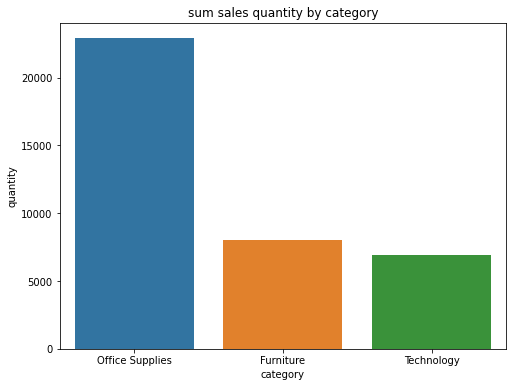

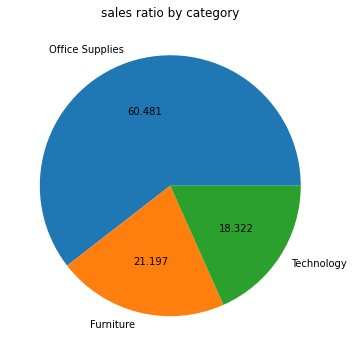

In [89]:
_df = q1_df
_df = _df[['category', 'quantity', 'ratio']]\
            .groupby('category')\
            .sum()\
            .reset_index()\
            .sort_values('quantity', ascending=False)

print('Sales quantity for each category')
fig, ax = plt.subplots(figsize=(8,6))
g = sns.barplot(ax=ax,
        x='category', 
        y='quantity',
        ci=None,
        data=_df)
plt.legend([], [], frameon=False)
plt.title('sum sales quantity by category')
ax.set_axisbelow(True)
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(_df.ratio, labels=_df.category, autopct=lambda x: "{:.3f}".format(x))
plt.title('sales ratio by category')
plt.show() 

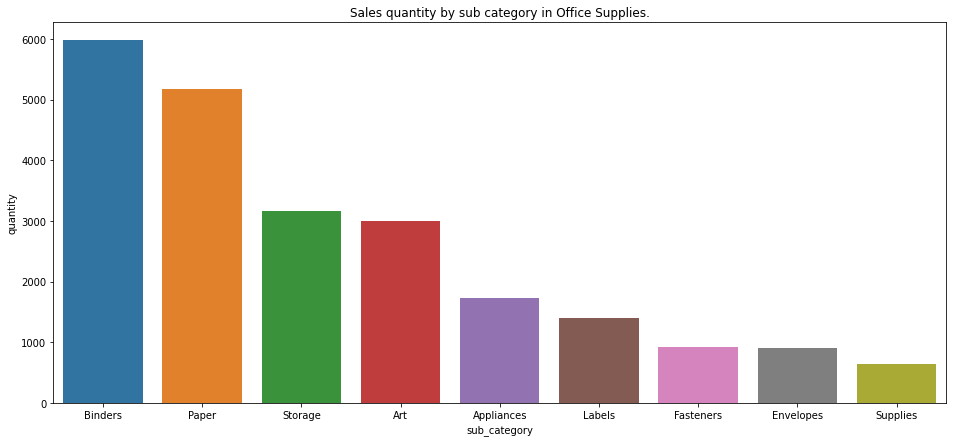

In [91]:
_df = q1_df[q1_df.category == 'Office Supplies'].sort_values('quantity', ascending=False)
fig, ax = plt.subplots(figsize=(16,7))
g = sns.barplot(ax=ax,
        x='sub_category', 
        y='quantity',
        ci=None,
        data=_df)
plt.legend([], [], frameon=False)
plt.title('Sales quantity by sub category in Office Supplies.')
ax.set_axisbelow(True)
plt.show()

Q.1 สินค้าประเภทไหนทำยอดขายมากที่ดสุด

***โดยสรุป***

สินค้าประเภท Office Supplies ขายดีที่สุดใน 3 ประเภทและเมื่อลองดูข้อมูลให้ลึกขึ้นจะพบว่า binders และ paper เป็นสินค้าที่ขายดีที่สุด

# Q2. ยอดขายมีรูปแบบหรือไม่

  order_date  order_id     sales
0 2014-01-02         1   468.900
1 2014-01-03        10  2203.151
2 2014-01-04         4   119.888
3 2014-01-06        11  5188.520
4 2014-01-07         3   601.024


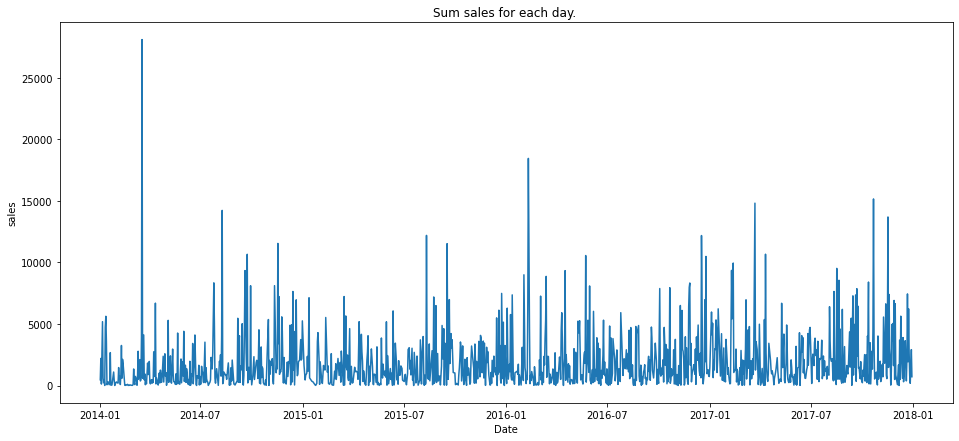

In [96]:
q2 = df[['order_date', 'order_id', 'sales', ]]
q2 = q2.groupby('order_date').agg({'order_id': 'count', 'sales': 'sum'}).reset_index()
print(q2.head(5))

fig, ax = plt.subplots(figsize=(16,7))
g = sns.lineplot(ax=ax,
                x='order_date',
                y='sales',
                data=q2)

plt.title('Sum sales for each day. ')
plt.xlabel('Date')
plt.show()

เมื่อพลอตกราฟยอดขายออกมาเป็นรายวันกราฟจะดูได้ค่อนข้างยาก วิธีแก้แบบหนึ่งคือการลดความละเอียดของข้อมูลลง

<ipython-input-97-238ee4d88d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['my'] = [r.order_date.strftime('%b %Y') for i, r in q2.iterrows()]


          my  month      sales
16  Jan 2014      1  28953.706
12  Feb 2014      2  12743.108
28  Mar 2014      3  54801.906
0   Apr 2014      4  24710.016
32  May 2014      5  29639.834


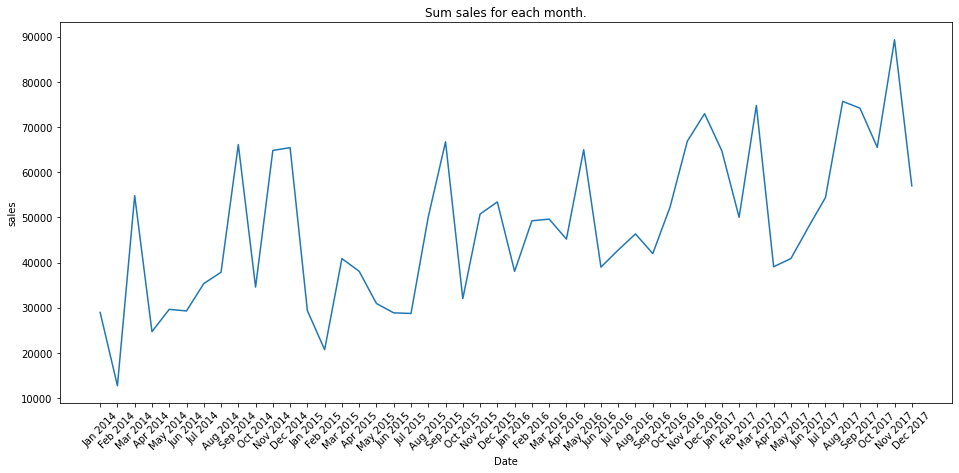

In [97]:
q2 = df[['order_date', 'order_id', 'sales', ]]
q2['my'] = [r.order_date.strftime('%b %Y') for i, r in q2.iterrows()]
q2 = q2.groupby('my').agg({'sales': 'sum'}).reset_index()
q2['_date'] = [datetime.strptime("1 {}".format(r['my']), '%d %b %Y') for i, r in q2.iterrows()]
q2['month'] = q2['_date'].dt.month
q2 = q2.sort_values('_date')[['my', 'month','sales']]

print(q2.head(5))

fig, ax = plt.subplots(figsize=(16,7))
g = sns.lineplot(ax=ax,
                x='my',
                y='sales',
                data=q2)

plt.title('Sum sales for each month.')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

เมื่อเปลี่ยนเป็นการสรุปรายเดือนแทนกราฟแบบรายวันก่อนหน้า กราฟจะดูง่ายขึ้นและจะพบว่ายอดขายมีมากขึ้นในทุก ๆ ปี

    year month      sales
16  2014   Jan  28953.706
12  2014   Feb  12743.108
28  2014   Mar  54801.906
0   2014   Apr  24710.016
32  2014   May  29639.834


<ipython-input-156-3a454e125c00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['my'] = [r.order_date.strftime('%b %Y') for i, r in q2.iterrows()]


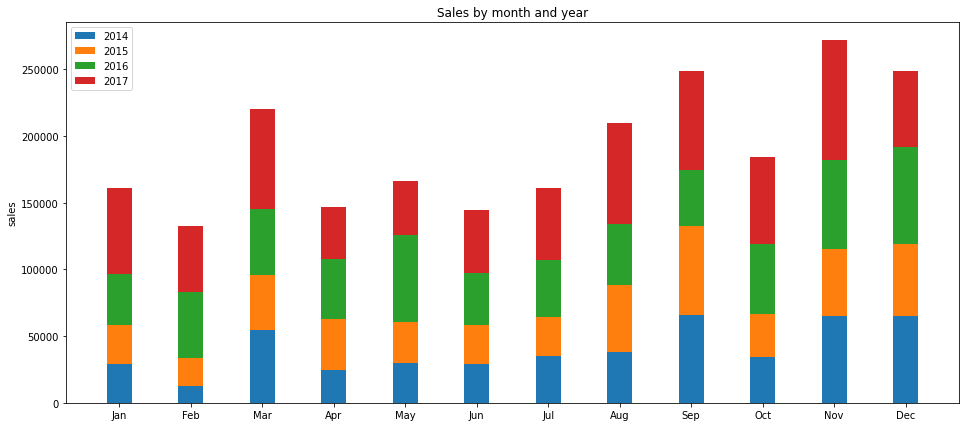

In [156]:
q2 = df[['order_date', 'order_id', 'sales', ]]
q2['my'] = [r.order_date.strftime('%b %Y') for i, r in q2.iterrows()]
q2 = q2.groupby('my').agg({'sales': 'sum'}).reset_index()
q2['_date'] = [datetime.strptime("1 {}".format(r['my']), '%d %b %Y') for i, r in q2.iterrows()]
q2['month'] = q2['_date'].dt.strftime('%b')
q2['year'] = q2['_date'].dt.year
q2 = q2.sort_values('_date')[['year', 'month','sales']]

print(q2.head(5))



width = 0.35
labels = q2.iloc[:12].month
_sales_2014 = np.array(q2[q2.year==2014].sales)
_sales_2015 = np.array(q2[q2.year==2015].sales)
_sales_2016 = np.array(q2[q2.year==2016].sales)
_sales_2017 = np.array(q2[q2.year==2017].sales)
arrs = [_sales_2014, _sales_2015, _sales_2016, _sales_2017]

# 
# Stacked bar chart
# 
fig, ax = plt.subplots(figsize=(16,7))
for i in range(len(arrs)):
    ax.bar(labels, arrs[i], width, bottom=sum(arrs[:i]), label='{}'.format(2014+i))


ax.set_ylabel('sales')
ax.set_title('Sales by month and year')
ax.legend()

เมื่อลองนำข้อมูลการขายมาสร้างกราฟในรูปแบบ Stacked Bar Chart เพื่อจะลองสังเกตุรูปแบบการขายว่าเป็น Seasoning หรือไม่ ก็พบว่าในช่วงปลาย ๆ ปีจะมียอดขายที่สูงกว่าช่วงต้นปี ยกเว้นช่วงเดือนตุลาคมที่จะมียอดขายที่น้อยลง

<ipython-input-75-c78a443a17e1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['month'] = q2['order_date'].dt.strftime('%m %b')


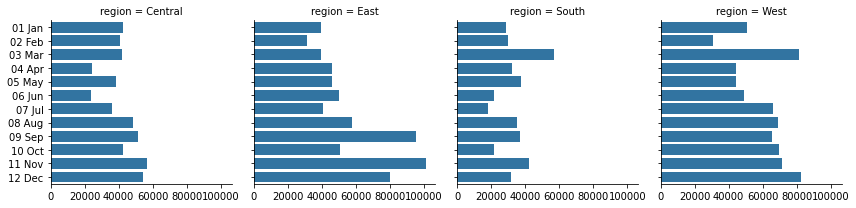

In [75]:
q2 = df[['order_date', 'region', 'sales']]
q2['month'] = q2['order_date'].dt.strftime('%m %b')
q2 = q2.groupby(['month', 'region']).agg({'sales': 'sum'}).reset_index()

g = sns.FacetGrid(q2, col="region", )
g.map_dataframe(sns.barplot, x="sales", y="month", data=q2, )
plt.show()

เมื่อลองนำข้มูลมาสร้างกราฟในลักษณะการแบ่งข้อมูลตาม Region จะพบว่า West เป็นภูมิภาคที่มียอดขายสูงที่สุด และเป็นภูมิภาคที่ช่วงเดือนตุลาคมไม่ได้มียอดขายที่ลดลง ตามที่เราพบก่อนหน้านี้

Q2. ยอดขายมีรูปแบบหรือไม่

***โดยสรุป***

รูปแบบการขายที่เราพบคือ
- ในแต่ละปีมีแนวโน้มที่จะมียอดขายที่สูงขึ้น 
- มักจะขายดีในช่วงปลายปี 
- และ West เป็นภูมิภาคที่ขายได้ดีที่สุดซึ่งยอดขายในเดือนตุลาคม ไม่ได้น้อยลงเหมือนภูมิภาคอื่น ๆ


# Q3. ในหนึ่งปีลูกค้ามักจะสั่งกี่ออเดอร์

<ipython-input-178-eb8ec1c39118>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['year'] = q3['order_date'].dt.year


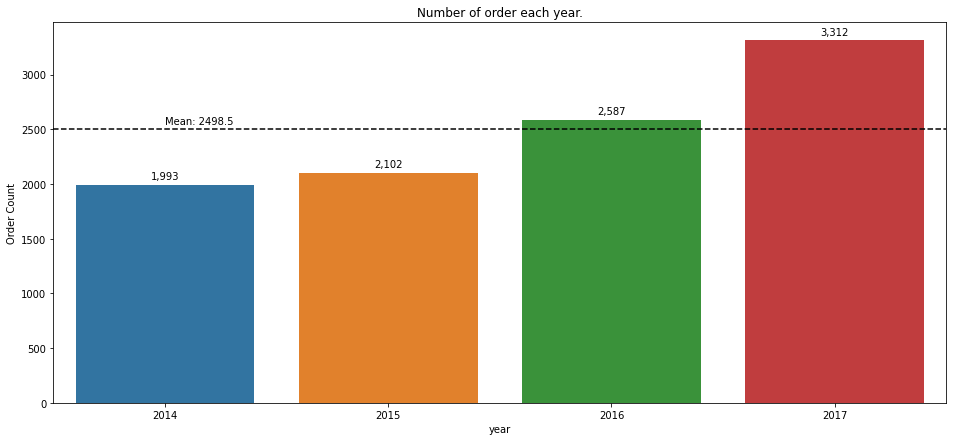

In [178]:
q3 = df[['order_date', 'order_id']]
q3['year'] = q3['order_date'].dt.year
q3 = q3.groupby('year').count().reset_index()[['year', 'order_id']]
mean_order = q3.order_id.mean()


fig, ax = plt.subplots(figsize=(16,7))
g = sns.barplot(ax=ax,
        x='year', 
        y='order_id',
        ci=None,
        data=q3)
plt.legend([], [], frameon=False)
plt.title('Number of order each year.')
plt.ylabel('Order Count')
ax.set_axisbelow(True)
ax.axhline(mean_order, color='black', linestyle='--' )
ax.text(0, mean_order+50, "Mean: {}".format(mean_order))

for index, row in q3.iterrows():
    g.text(row.name, row.order_id+50, "{:,}".format(row.order_id), color='black', ha="center")
    
plt.show()

Q3. ในหนึ่งปีลูกค้ามักจะสั่งกี่ออเดอร์

***สรุป***

โดยทั่วไปในหนึ่งปีจะมีออเดอร์เฉลี่ย 2498.5 ออเดอร์

***กราฟเพิ่มเติม***

ค่าเฉลี่ยออเดอร์ในหนึ่งปีของลูค้าต่ละราย

<ipython-input-10-3495781798f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['year'] = q3['order_date'].dt.year


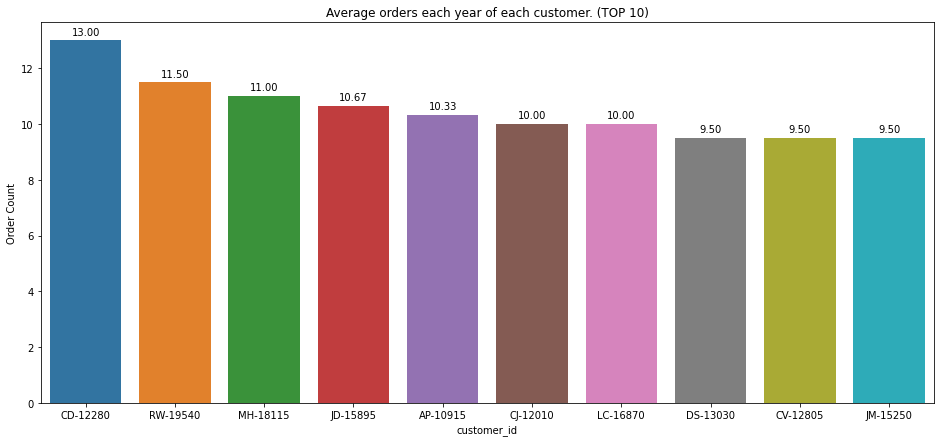

In [10]:
q3 = df[['order_date', 'order_id', 'customer_id']]
q3['year'] = q3['order_date'].dt.year
q3 = q3[['year', 'customer_id', 'order_id']]\
        .groupby(['year', 'customer_id'])\
        .count()\
        .reset_index()[['order_id', 'customer_id']]\
        .groupby(['customer_id'])\
        .mean()\
        .reset_index()\
        .sort_values('order_id', ascending=False)\
        .head(10)\
        .reset_index()


fig, ax = plt.subplots(figsize=(16,7))
g = sns.barplot(ax=ax,
        x='customer_id', 
        y='order_id',
        ci=None,
        data=q3)
plt.legend([], [], frameon=False)
plt.title('Average orders each year of each customer. (TOP 10)')
plt.ylabel('Order Count')
ax.set_axisbelow(True)

for index, row in q3.iterrows():
    g.text(index, row.order_id+0.2, "{:,.2f}".format(row.order_id), color='black', ha="center")
    
plt.show()

# Q4. ส่วนลดมีผลต่อยอดขายหรือไม่

In [11]:
q4 = df.copy()
q4 = df[['order_date', 'order_id', 'discount', 'sales']]
q4['discount_flag'] = [1 if r.discount > 0 else 0 for i, r in q4.iterrows()]
q4 = q4.groupby('order_date')\
        .agg({'order_id': 'count', 'discount_flag': 'sum'})\
        .reset_index()[['order_date', 'order_id', 'discount_flag']]
q4

<ipython-input-11-f7b5b20f1565>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4['discount_flag'] = [1 if r.discount > 0 else 0 for i, r in q4.iterrows()]


order_date  order_id  discount_flag
0    2014-01-02         1              0
1    2014-01-03        10              9
2    2014-01-04         4              1
3    2014-01-06        11              1
4    2014-01-07         3              3
...         ...       ...            ...
1232 2017-12-26         4              2
1233 2017-12-27         2              2
1234 2017-12-28        19             10
1235 2017-12-29        12              2
1236 2017-12-30         7              5

[1237 rows x 3 columns]

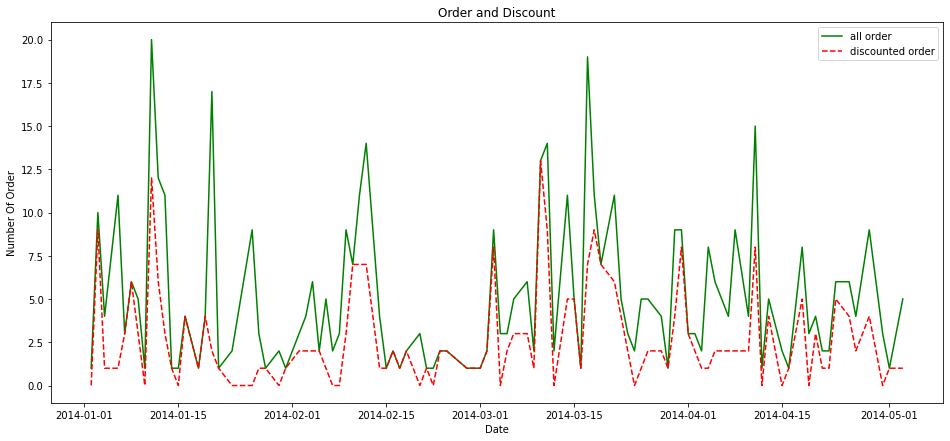

In [185]:
_q4 = q4.head(100)
fig, ax = plt.subplots(figsize=(16,7))
plt.plot(_q4.order_date, _q4.order_id, color='g', label='all order')
plt.plot(_q4.order_date, _q4.discount_flag, color='r', linestyle='--', label='discounted order')
plt.title('Order and Discount')
plt.xlabel('Date')
plt.ylabel('Number Of Order')
plt.legend()
plt.show()

Q4. ส่วนลดมีผลต่อยอดขายหรือไม่

---
จากกราฟจะพบว่ารูปแบบของจำนวนออรเดอที่มีส่วนลด(เส้นประสีแดง) 
จะเป็นไปตามรูปแบบของยอดออเดอร์(เส้นสีเขียว) 
หมายความส่วนลดมีความสัมพันธ์ที่แปรผันตรงกับยอดออเดอร์ คือถ้าช่วงไหนที่มีส่วนลดเยอะยอดออเดอร์ก็จะสูงตามไปด้วย
---

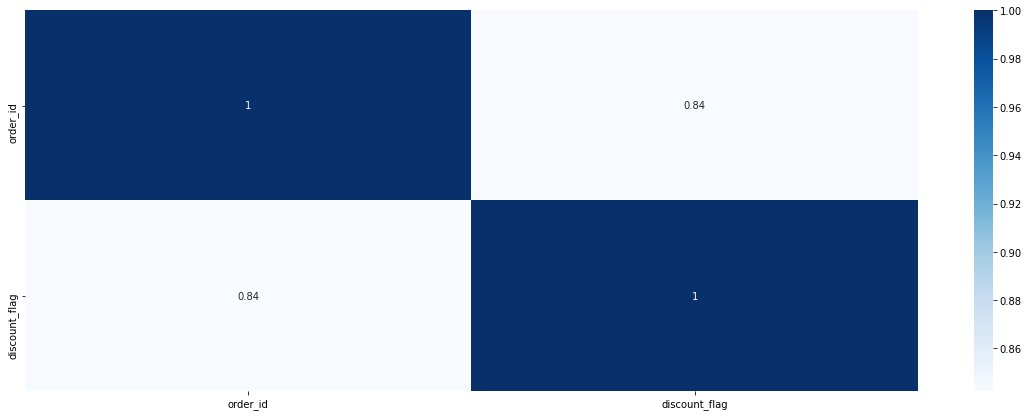

In [191]:
_q4 = q4[['order_id', 'discount_flag']]
corr = _q4.corr()
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(ax=ax,
            data=corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="Blues", 
            annot=True
)
plt.show()

อีกวิธีหนึ่งท่ีสามารถใช้อธิบายได้นอกจากการดูรูปแบบของกราฟคือการทำ Correlation Matrix จากผลลัพธ์ข้างบนะพบว่า ยอดออเดอร์(order_id) และ ออเดอร์ที่ได้รับส่วนลด(discount_flag) นั้นมีความสัมพันธ์กันอย่างมากถึง 0.84 ซึ่งสอดคล้องกับการวิเคราะห์จาก Pattern ที่ปรากฏบนกราฟก่อนหน้า

# Q5. ลูกค้าที่ไม่กลับมาใช้บริการเป็นลูกค้ากลุ่มไหน

กาวิเคราะ์นี้เราต้องนิยามก่อนว่าลูกค้าที่ไม่กลับมาใช้บริการก่อน 

ซึ่งในกรณีจะนิยามว่า ***ลูกค้าที่ไม่มียอดสั่งซื้อมามากกว่า 1 ปีนับจากวันล่าสุดของข้อมูล*** ให้ถือว่าเป็นลูกค้าที่ไม่กลับมาใช้บริการ

In [13]:
def is_loss_customer(latest_active_dt, latest_date=date(2017, 12, 30), threshold_days=365):
    latest_active_date = latest_active_dt.date()
    if (latest_date - latest_active_date).days >= threshold_days:
        return True
    else:
        return False
    
q5 = df.copy()
latest_date = q5['order_date'].max()
customer_df = df.groupby('customer_id').agg({'order_date': 'max'}).reset_index()
customer_df['is_loss'] = df.order_date.apply(is_loss_customer)

print(customer_df.is_loss.value_counts())
loss_customer = customer_df.customer_id[customer_df.is_loss == True]
print(loss_customer)

True     577
False    216
Name: is_loss, dtype: int64
0      AA-10315
1      AA-10375
2      AA-10480
3      AA-10645
4      AB-10015
         ...   
788    XP-21865
789    YC-21895
790    YS-21880
791    ZC-21910
792    ZD-21925
Name: customer_id, Length: 577, dtype: object


จากข้างต้นเป็นการค้นหากลุ่มลูกค้าที่ไม่กลับมาใช้บริการตามเงื่อนไข แล้วพบว่ามี ***ลูกค้าจำนวน 577 ราย กลายเป็นกลุ่มที่ไม่กลับมาใช้บริการ***

In [193]:
lc_transaction = df[df.customer_id.isin(loss_customer)]
print('Loss Customer transactions: ', lc_transaction.shape[0])
lc_transaction.head(10)

Loss Customer transactions:  7288


row_id        order_id order_date  ship_date       ship_mode customer_id  \
2        3  CA-2016-138688 2016-12-06 2016-06-16    Second Class    DV-13045   
3        4  US-2015-108966 2015-11-10 2015-10-18  Standard Class    SO-20335   
4        5  US-2015-108966 2015-11-10 2015-10-18  Standard Class    SO-20335   
5        6  CA-2014-115812 2014-09-06 2014-06-14  Standard Class    BH-11710   
6        7  CA-2014-115812 2014-09-06 2014-06-14  Standard Class    BH-11710   
7        8  CA-2014-115812 2014-09-06 2014-06-14  Standard Class    BH-11710   
8        9  CA-2014-115812 2014-09-06 2014-06-14  Standard Class    BH-11710   
9       10  CA-2014-115812 2014-09-06 2014-06-14  Standard Class    BH-11710   
10      11  CA-2014-115812 2014-09-06 2014-06-14  Standard Class    BH-11710   
11      12  CA-2014-115812 2014-09-06 2014-06-14  Standard Class    BH-11710   

      customer_name    segment        country             city  ...  \
2   Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3    Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4    Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
5   Brosina Hoffman   Consumer  United States      Los Angeles  ...   
6   Brosina Hoffman   Consumer  United States      Los Angeles  ...   
7   Brosina Hoffman   Consumer  United States      Los Angeles  ...   
8   Brosina Hoffman   Consumer  United States      Los Angeles  ...   
9   Brosina Hoffman   Consumer  United States      Los Angeles  ...   
10  Brosina Hoffman   Consumer  United States      Los Angeles  ...   
11  Brosina Hoffman   Consumer  United States      Los Angeles  ...   

   postal_code  region       product_id         category sub_category  \
2        90036    West  OFF-LA-10000240  Office Supplies       Labels   
3        33311   South  FUR-TA-10000577        Furniture       Tables   
4        33311   South  OFF-ST-10000760  Office Supplies      Storage   
5        90032    West  FUR-FU-10001487        Furniture  Furnishings   
6        90032    West  OFF-AR-10002833  Office Supplies          Art   
7        90032    West  TEC-PH-10002275       Technology       Phones   
8        90032    West  OFF-BI-10003910  Office Supplies      Binders   
9        90032    West  OFF-AP-10002892  Office Supplies   Appliances   
10       90032    West  FUR-TA-10001539        Furniture       Tables   
11       90032    West  TEC-PH-10002033       Technology       Phones   

                                         product_name      sales  quantity  \
2   Self-Adhesive Address Labels for Typewriters b...    14.6200         2   
3       Bretford CR4500 Series Slim Rectangular Table   957.5775         5   
4                      Eldon Fold 'N Roll Cart System    22.3680         2   
5   Eldon Expressions Wood and Plastic Desk Access...    48.8600         7   
6                                          Newell 322     7.2800         4   
7                      Mitel 5320 IP Phone VoIP phone   907.1520         6   
8   DXL Angle-View Binders with Locking Rings by S...    18.5040         3   
9                    Belkin F5C206VTEL 6 Outlet Surge   114.9000         5   
10           Chromcraft Rectangular Conference Tables  1706.1840         9   
11      Konftel 250 Conference phone - Charcoal black   911.4240         4   

    discount    profit  
2       0.00    6.8714  
3       0.45 -383.0310  
4       0.20    2.5164  
5       0.00   14.1694  
6       0.00    1.9656  
7       0.20   90.7152  
8       0.20    5.7825  
9       0.00   34.4700  
10      0.20   85.3092  
11      0.20   68.3568  

[10 rows x 21 columns]

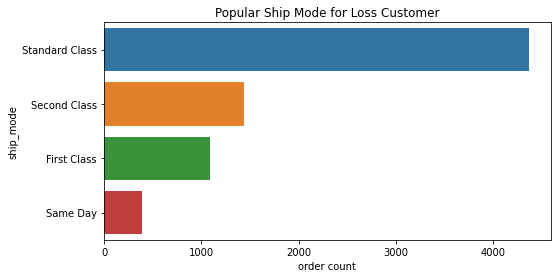

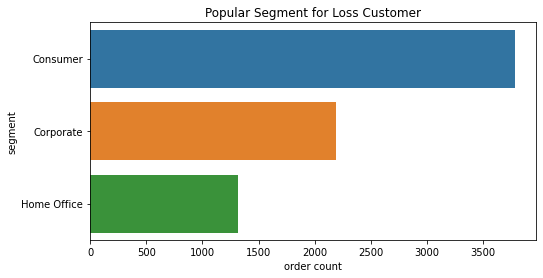

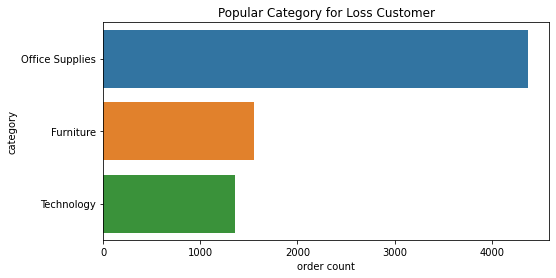

In [15]:
# 
# Popular Ship Mode for Loss Customer
# 
_data_df = lc_transaction[['order_id', 'ship_mode']]\
                .groupby('ship_mode')\
                .count()\
                .reset_index()\
                .sort_values('order_id', ascending=False)

fig, ax = plt.subplots(figsize=(8,4))
g = sns.barplot(ax=ax,
        x='order_id', 
        y='ship_mode',
        ci=None,
        data=_data_df)
plt.title('Popular Ship Mode for Loss Customer')
ax.set(xlabel='order count', ylabel='ship_mode')
plt.show()

# 
# Popular Segment for Loss Customer
# 
_data_df = lc_transaction[['order_id', 'segment']]\
                .groupby('segment')\
                .count()\
                .reset_index()\
                .sort_values('order_id', ascending=False)

fig, ax = plt.subplots(figsize=(8,4))
g = sns.barplot(ax=ax,
        x='order_id', 
        y='segment',
        ci=None,
        data=_data_df)
plt.title('Popular Segment for Loss Customer')
ax.set(xlabel='order count', ylabel='segment')
plt.show()

# 
# Popular Category for Loss Customer
# 
_data_df = lc_transaction[['order_id', 'category']]\
                .groupby('category')\
                .count()\
                .reset_index()\
                .sort_values('order_id', ascending=False)

fig, ax = plt.subplots(figsize=(8,4))
g = sns.barplot(ax=ax,
        x='order_id', 
        y='category',
        ci=None,
        data=_data_df)
plt.title('Popular Category for Loss Customer')
ax.set(xlabel='order count', ylabel='category')
plt.show()

Q5. ลูกค้าที่ไม่กลับมาใช้บริการเป็นลูกค้ากลุ่มไหน

---

โดยสรุป

- กลุ่มลูกค้าที่เข้าเกณฑ์ถูกจัดอยู่ในกลุ่มที่ไม่กลับมาใช้บริการมีจำนวนทั้งหมด 577 ราย
- คิดเป็นจำนวน transaction 7288 จากทั้งหมด 9994
- โดยส่วนมากลูกค้าในกลุ่มที่ถูกจัดให้เป็นกลุ่มที่ไม่กลับมาใช้บริการจะเป็นลูกค้าที่
    - เป็นลูกค้าแบบบุคคลทั่วไป
    - เลือกใช้ ship mode เป็น standard class
    - เลือกซื้อสินค้าประเภท Office Supplies

นั่นหมายความว่าลูกค้าปัจจุบันที่มีลักษณะเหมือนกลุ่มดังกล่าวก็อาจจะมีแนวโน้มเลิกใช้บริการ

---